In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold

In [106]:
np.random.seed(0) # For same result for everytime

In [107]:
# Dogs: higher ear flappiness index,lower whisker length
# (Mean,Standard Deviation,no.of datapoints)

dogs_whisker_length = np.random.normal(loc=5, scale=1, size=10)
dogs_ear_flappiness_index = np.random.normal(loc=8, scale=1, size=10)

In [108]:
# Cats: lower ear flappiness index,higher whisker length

cats_whisker_length = np.random.normal(loc=8, scale=1, size=10)
cats_ear_flappiness_index = np.random.normal(loc=5, scale=1, size=10)

In [109]:
# Combine Data 
dogs_data = np.vstack((dogs_whisker_length, dogs_ear_flappiness_index)).T
cats_data = np.vstack((cats_whisker_length, cats_ear_flappiness_index)).T
data = np.vstack((dogs_data, cats_data))
labels = np.hstack((np.zeros(len(dogs_data)), np.ones(len(cats_data))))

In [110]:
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [111]:
# Split data into training
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


# random state -> No randomization happens in the data.

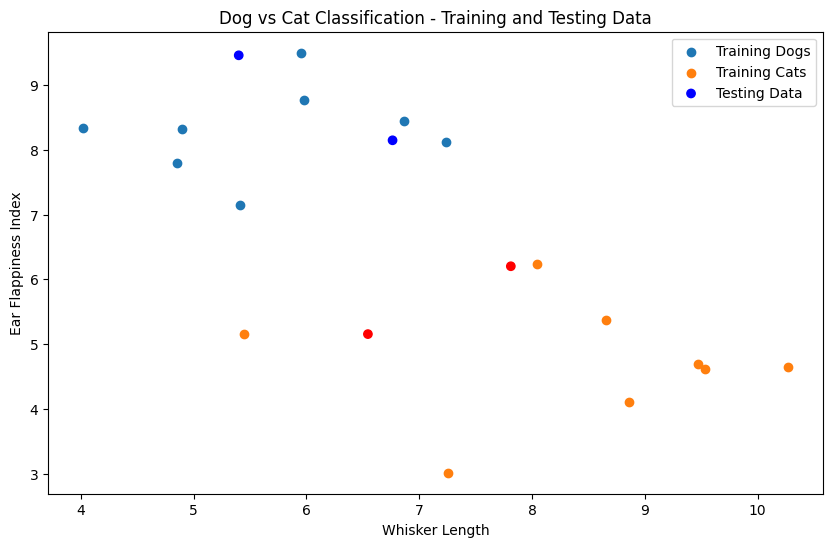

In [112]:
def plot_data(X_train, y_train, X_test, y_test):
    """Helper function to visualize training and test data"""
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train[y_train == 0][:,0], X_train[y_train == 0][:,1], label='Training Dogs')
    plt.scatter(X_train[y_train == 1][:,0], X_train[y_train == 1][:,1], label='Training Cats')
    plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='bwr', label='Testing Data')
    plt.xlabel('Whisker Length')
    plt.ylabel('Ear Flappiness Index')
    plt.title('Dog vs Cat Classification - Training and Testing Data')
    plt.legend()
    plt.show()

plot_data(X_train, y_train, X_test, y_test)

In [113]:
# Implementing random linear classifier Algorithm

def random_linear_classifier(data_dogs,data_cats,k,d):
    best_error = float('inf')
    best_theta = None
    best_theta0 = None

    for _ in range(k):
        theta = np.random.normal(size=d)
        theta0 = np.random.normal()
    
        error = compute_error(data_dogs,data_cats,theta,theta0)

        if error < best_error:
            best_error = error
            best_theta = theta
            best_theta0 = theta0

    return best_theta , best_theta0 , best_error



    
def compute_error(data_dogs,data_cats,theta,theta0):
    error = 0
    for x_dog in data_dogs:
        if np.dot(theta,x_dog) + theta0 <= 0:
            error += 1

    for x_cat in data_cats:
        if np.dot(theta,x_cat) + theta0 > 0:
            error += 1
    
    return error

In [114]:
# Run random linear classifier algorithm on training data
k = 100 # Number of iterations
# k = best_k
d = 2 # Number of features
best_theta_train, best_theta0_train, train_error = random_linear_classifier(X_train[y_train == 0],X_train[y_train == 1],k,d)


In [115]:
def calculate_decision_boundary(theta, theta0, X_range):
    """Calculate y values for decision boundary line"""
    x_vals = np.linspace(X_range.min()-1, X_range.max()+1, 100)
    y_vals = (-theta[0]/theta[1]) * x_vals - (theta0/theta[1])
    return x_vals, y_vals

# For training data boundary
x_vals_train, y_vals_train = calculate_decision_boundary(
    best_theta_train, best_theta0_train, X_train[:,0])

# For test data boundary (using same classifier but test data range)
x_vals_test, y_vals_test = calculate_decision_boundary(
    best_theta_train, best_theta0_train, X_test[:,0])

In [116]:
# lot the decision boundary on training data
x_vals_train = np.linspace(2,10,100)
y_vals_train = (-best_theta_train[0]/best_theta_train[1]) * x_vals_train-(best_theta0_train/best_theta_train[1])

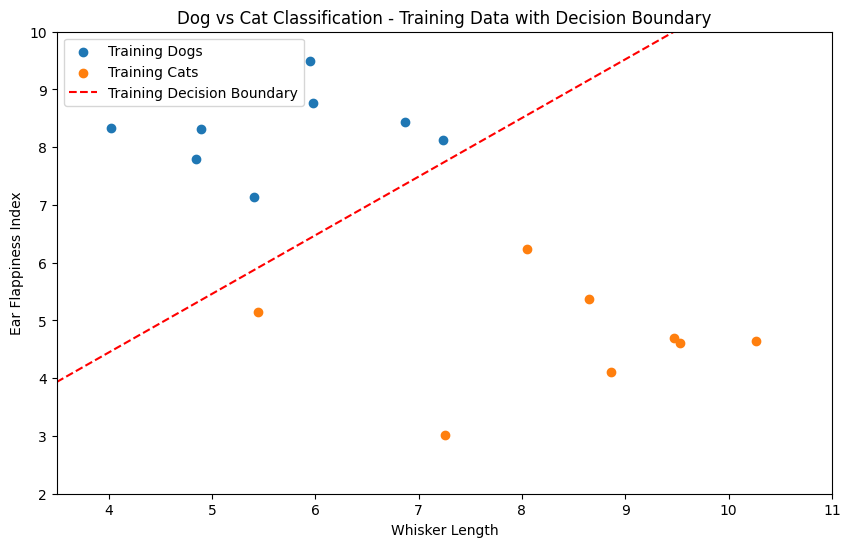

Training Error: 0


In [117]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 0][:,0], X_train[y_train == 0][:,1], label='Training Dogs')
plt.scatter(X_train[y_train == 1][:,0], X_train[y_train == 1][:,1], label='Training Cats')
plt.plot(x_vals_train, y_vals_train, 'r--', label='Training Decision Boundary')
plt.xlim([3.5, 11])
plt.ylim([2, 10])
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification - Training Data with Decision Boundary')
plt.legend()
plt.show()

print(f"Training Error: {train_error}")

In [118]:
print(f"Training Error: {train_error}")

Training Error: 0


In [119]:
# Compute testing error 
test_error = compute_error(X_test[y_test == 0],X_test[y_test == 1],best_theta_train,best_theta0_train)
print(f"Testing Error: {test_error}")

Testing Error: 0


In [121]:
# Calculate test error
test_error = compute_error(X_test[y_test == 0], X_test[y_test == 1], 
                          best_theta_train, best_theta0_train)
print(f"Testing Error: {test_error}")

# Predict labels for test data
predicted_labels = np.zeros_like(y_test)
for i, x_test in enumerate(X_test):
    if np.dot(best_theta_train, x_test) + best_theta0_train > 0:
        predicted_labels[i] = 1

Testing Error: 0


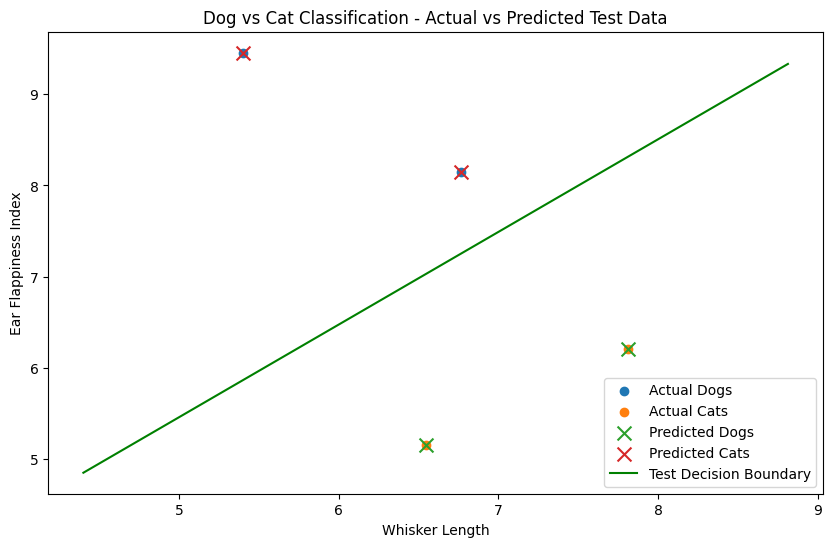

In [122]:
plt.figure(figsize=(10, 6))
# Actual labels
plt.scatter(X_test[y_test == 0][:,0], X_test[y_test == 0][:,1], label='Actual Dogs')
plt.scatter(X_test[y_test == 1][:,0], X_test[y_test == 1][:,1], label='Actual Cats')
# Predicted labels
plt.scatter(X_test[predicted_labels == 0][:,0], X_test[predicted_labels == 0][:,1], 
            marker='x', s=100, label='Predicted Dogs')
plt.scatter(X_test[predicted_labels == 1][:,0], X_test[predicted_labels == 1][:,1], 
            marker='x', s=100, label='Predicted Cats')
# Decision boundary
plt.plot(x_vals_test, y_vals_test, 'g-', label='Test Decision Boundary')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification - Actual vs Predicted Test Data')
plt.legend()
plt.show()